In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=16b3d812503876657c7f5aae7a89422e


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | new glasgow
Processing Record 3 of Set 1 | katangli
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | lasa
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kota kinabalu
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | virginia beach
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | kulu
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | belmonte
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | cape town
Process

Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | fukue
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | lolua
City not found. Skipping...
Processing Record 48 of Set 4 | kikwit
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | behbahan
Processing Record 1 of Set 5 | port hawkesbury
Processing Record 2 of Set 5 | tautira
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | shaunavon
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | port keats
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | orguz
Processing Record 10 of Set 5 | jumla
Processing Record 11 of Set 5 | cape canaveral
Processing Record 12 of Set 5 | sept-iles
Processing Record 13 of Set 5 | kudahuvadhoo
Processing Record 14 of 

Processing Record 28 of Set 8 | viligili
City not found. Skipping...
Processing Record 29 of Set 8 | livingston
Processing Record 30 of Set 8 | kysyl-syr
Processing Record 31 of Set 8 | powell
Processing Record 32 of Set 8 | presidencia roque saenz pena
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 35 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 8 | mazagao
Processing Record 37 of Set 8 | srednekolymsk
Processing Record 38 of Set 8 | vilhena
Processing Record 39 of Set 8 | show low
Processing Record 40 of Set 8 | champerico
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | novoraychikhinsk
Processing Record 43 of Set 8 | micheweni
Processing Record 44 of Set 8 | chokwe
Processing Record 45 of Set 8 | verkhoyansk
Processing Record 46 of Set 8 | grand-santi
Processing Record 47 of Set 8 | oranjemund
Processing Record 48 of Set 8 | petukhovo
Pro

Processing Record 10 of Set 12 | fengcheng
Processing Record 11 of Set 12 | rantepao
Processing Record 12 of Set 12 | plettenberg bay
Processing Record 13 of Set 12 | fort nelson
Processing Record 14 of Set 12 | grants pass
Processing Record 15 of Set 12 | volovo
Processing Record 16 of Set 12 | campbellsville
Processing Record 17 of Set 12 | vitoria
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | prince rupert
Processing Record 20 of Set 12 | sosnogorsk
Processing Record 21 of Set 12 | eslamshahr
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | corinth
Processing Record 24 of Set 12 | itarema
Processing Record 25 of Set 12 | yanam
Processing Record 26 of Set 12 | chiang khong
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | chippewa falls
Processing Record 29 of Set 12 | malpe
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | ames
Processing Record 32 

In [8]:
# Print the city count to confirm sufficient count.
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,73.40,38,40,13.87,AR,2020-02-22 20:22:53
1,New Glasgow,45.58,-62.65,34.00,67,97,8.99,CA,2020-02-22 20:25:23
2,Katangli,51.71,143.23,10.94,97,97,3.60,RU,2020-02-22 20:25:24
3,Comodoro Rivadavia,-45.87,-67.50,80.60,26,26,21.92,AR,2020-02-22 20:25:24
4,Christchurch,-43.53,172.63,60.01,93,0,3.36,NZ,2020-02-22 20:25:24
5,Qaanaaq,77.48,-69.36,-14.08,64,99,4.52,GL,2020-02-22 20:25:24
6,Rikitea,-23.12,-134.97,78.94,70,1,7.52,PF,2020-02-22 20:25:25
7,Lasa,46.62,10.70,42.80,69,5,8.05,IT,2020-02-22 20:25:25
8,Port Hardy,50.70,-127.42,42.80,87,40,10.29,CA,2020-02-22 20:25:25
9,Atuona,-9.80,-139.03,81.86,76,0,13.73,PF,2020-02-22 20:25:26


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-02-22 20:22:53,-54.80,-68.30,73.40,38,40,13.87
1,New Glasgow,CA,2020-02-22 20:25:23,45.58,-62.65,34.00,67,97,8.99
2,Katangli,RU,2020-02-22 20:25:24,51.71,143.23,10.94,97,97,3.60
3,Comodoro Rivadavia,AR,2020-02-22 20:25:24,-45.87,-67.50,80.60,26,26,21.92
4,Christchurch,NZ,2020-02-22 20:25:24,-43.53,172.63,60.01,93,0,3.36
5,Qaanaaq,GL,2020-02-22 20:25:24,77.48,-69.36,-14.08,64,99,4.52
6,Rikitea,PF,2020-02-22 20:25:25,-23.12,-134.97,78.94,70,1,7.52
7,Lasa,IT,2020-02-22 20:25:25,46.62,10.70,42.80,69,5,8.05
8,Port Hardy,CA,2020-02-22 20:25:25,50.70,-127.42,42.80,87,40,10.29
9,Atuona,PF,2020-02-22 20:25:26,-9.80,-139.03,81.86,76,0,13.73


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582403314.9049702

In [14]:
today = time.strftime("%x")
today

'02/22/20'

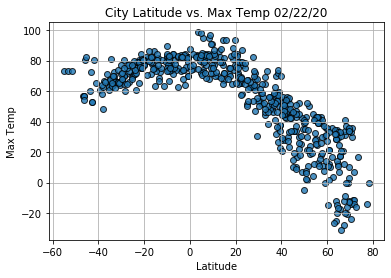

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

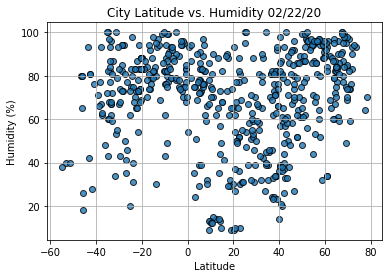

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

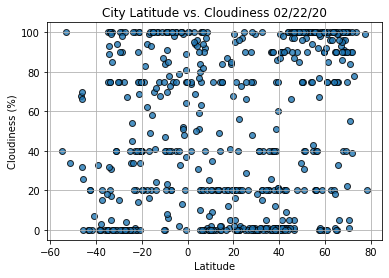

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

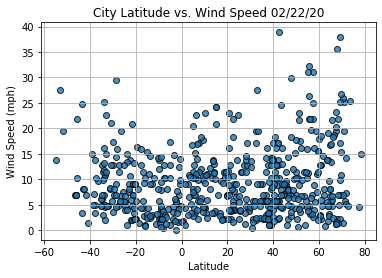

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Annotate the text for the p and r values.
    plt.text(0,1, f"The p-value is: {p_value:.3f}", fontsize=10, transform=plt.gcf().transFigure, color="purple")
    plt.text(0,0, f"The r-value is: {r_value:.3f}", fontsize=10, transform=plt.gcf().transFigure, color="orange")
    
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

index13

City                       Dikson
Country                        RU
Date          2020-02-22 20:25:26
Lat                         73.51
Lng                         80.55
Max Temp                    16.52
Humidity                       93
Cloudiness                    100
Wind Speed                  25.37
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
564    False
565     True
566     True
567    False
568     True
Name: Lat, Length: 569, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,New Glasgow,CA,2020-02-22 20:25:23,45.58,-62.65,34.00,67,97,8.99
2,Katangli,RU,2020-02-22 20:25:24,51.71,143.23,10.94,97,97,3.60
5,Qaanaaq,GL,2020-02-22 20:25:24,77.48,-69.36,-14.08,64,99,4.52
7,Lasa,IT,2020-02-22 20:25:25,46.62,10.70,42.80,69,5,8.05
8,Port Hardy,CA,2020-02-22 20:25:25,50.70,-127.42,42.80,87,40,10.29
...,...,...,...,...,...,...,...,...,...
561,Kincardine,GB,2020-02-22 20:27:44,56.07,-3.72,39.20,86,20,21.92
563,Vrangel,RU,2020-02-22 20:27:45,42.73,133.08,27.27,60,0,38.86
565,Dalvik,IS,2020-02-22 20:27:45,65.97,-18.53,20.80,81,96,6.80
566,Guilin,CN,2020-02-22 20:27:46,25.28,110.29,53.60,100,75,5.50


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

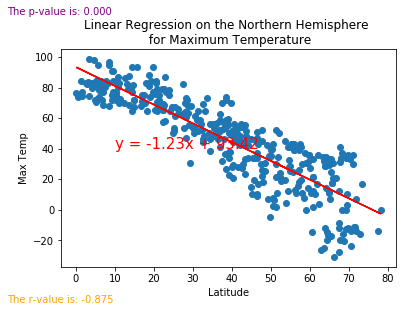

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))

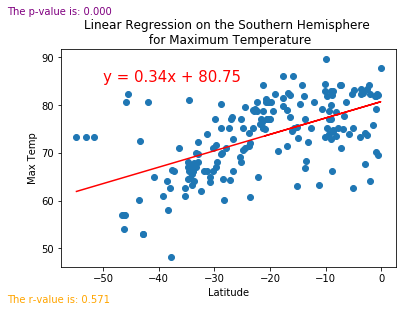

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,85))

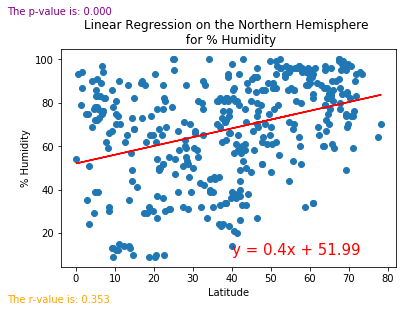

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Humidity")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(40,10))

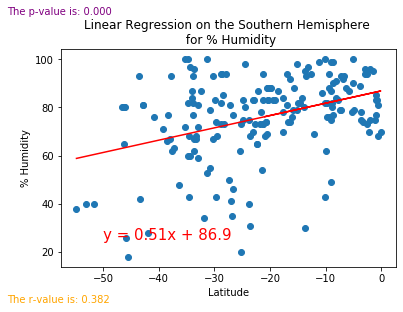

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-50,25))

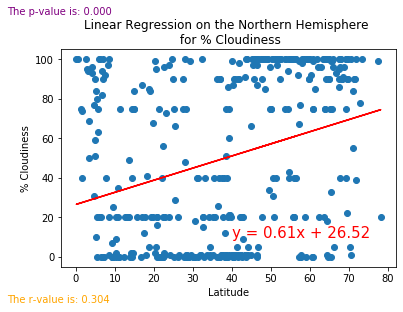

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Cloudiness")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(40,10))

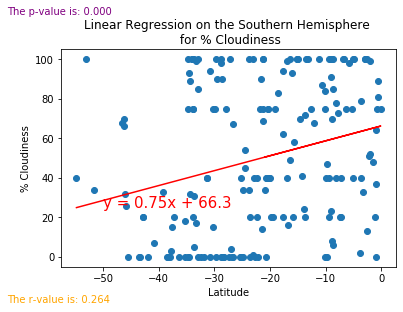

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Cloudiness")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-50,25))


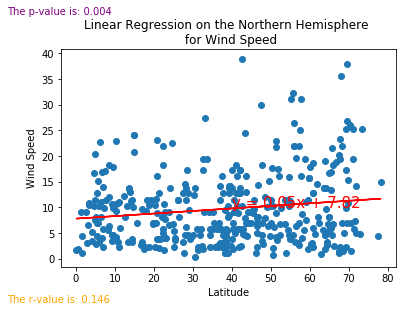

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed",(40,10))

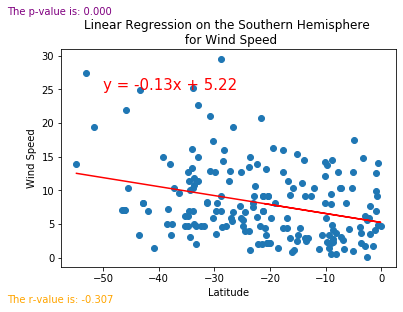

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-50,25))